In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from IPython.display import display
from PIL import Image
import pickle
Pkl_Filename = "P3ModelPyTorch.pkl"
with open(Pkl_Filename, 'rb') as file:  
    SavedModel = pickle.load(file)
SavedModel

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
transform_test = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                    ])

In [3]:
def imd(im):
    newPic = transform_test(Image.open(im))
    newPic = newPic.unsqueeze(0)
    outputNew = SavedModel(newPic)
    _, predicted = torch.max(outputNew.data, 1)
    display(Image.open(im).resize((200,200)).convert('L'))
    if predicted == 0:
        print('Anger')
    elif predicted == 1:
        print('Disgust')
    elif predicted == 2:
        print('Fear')
    elif predicted == 3:
        print('Happy')
    elif predicted == 4:
        print('Sad')
    elif predicted == 5:
        print('Surprise')
    elif predicted == 6:
        print('Neutral')

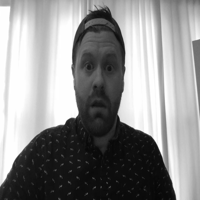

Surprise


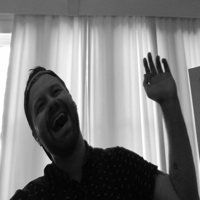

Happy


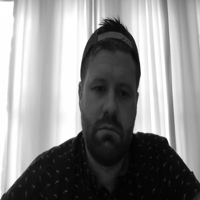

Neutral


In [4]:
imd('/Users/blakemyers/Desktop/image1.jpg')
imd('/Users/blakemyers/Desktop/image2.jpg')
imd('/Users/blakemyers/Desktop/image3.jpg')